In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [5]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [6]:
C = 1.0
svc = svm.SVC(kernel='linear', C=C, gamma=0).fit(X, y)

In [7]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max - x_min) / 100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

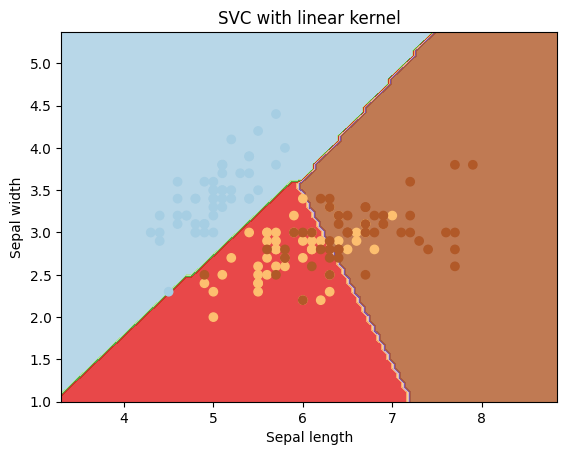

In [9]:
plt.subplot(1, 1, 1)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [16]:
svc = svm.SVC(kernel='rbf', C=1,gamma=0).fit(X, y)

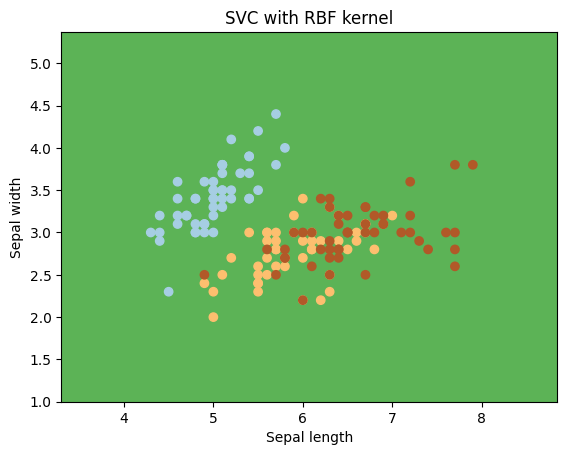

In [17]:
plt.subplot(1, 1, 1)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')
plt.show()

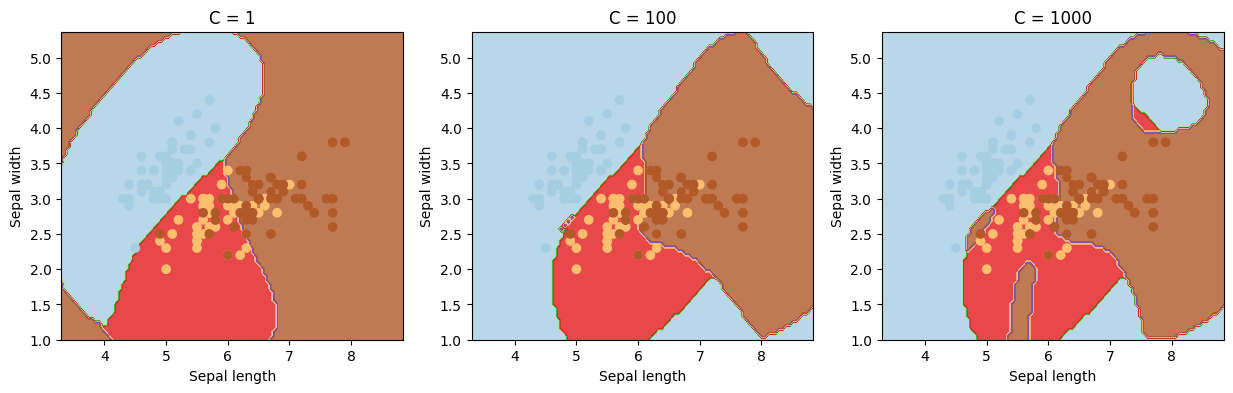

In [24]:
C_values = [1, 100, 1000]

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

for i, C in enumerate(C_values):
    svc = svm.SVC(kernel='rbf', C=C, gamma=1).fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max - x_min) / 100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axs[i].contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    axs[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    axs[i].set_xlabel('Sepal length')
    axs[i].set_ylabel('Sepal width')
    axs[i].set_title(f'C = {C}')

plt.show()